**Merging**: Putting different data sets from one or more sources together into a single dataset to describe a larger phenomena.

**Seaborn**: Open source python library that helps us build visualizations!

1. Make sure your virtual environment is running!
2. pip install pandas ```python -m pip install pandas```
3. pip install openpyxl
4. pip install matplotlib
5. pip install seaborn


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [29]:
path = r"/Users/tombowers/Codefi/Lesson_09/Coffee Data.xlsx"

orders_df = pd.read_excel(path, sheet_name="orders")
product_df = pd.read_excel(path, sheet_name="products")
customer_df = pd.read_excel(path, sheet_name="customers")

# if you need to drop columns: orders_df.drop(columns=["Customer Name"])

customer_df.head()


,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [30]:
orders_customers_df = orders_df.merge(customer_df, on="Customer ID", how="inner")

orders_customers_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [31]:
final_df = orders_customers_df.merge(product_df, on="Product ID")

In [32]:
columns = ["Order ID", "Order Date", "Quantity", "Country", "Loyalty Card", "Coffee Type", "Roast Type", "Profit", "Price per 100g", "Product ID"]

coffee_df = final_df[columns]

coffee_df.set_index("Order ID", inplace=True)

coffee_df.head()

,Order Date,Quantity,Country,Loyalty Card,Coffee Type,Roast Type,Profit,Price per 100g,Product ID
Order ID,,,,,,,,,
QEV-37451-860,2019-09-05,2,United States,Yes,Rob,M,0.5970,0.9950,R-M-1
QEV-37451-860,2019-09-05,5,United States,Yes,Exc,M,0.9075,1.6500,E-M-0.5
FAA-43335-268,2021-06-17,1,United States,Yes,Ara,L,1.1655,1.2950,A-L-1
KAC-83089-793,2021-07-15,2,Ireland,No,Exc,M,1.5125,1.3750,E-M-1
KAC-83089-793,2021-07-15,2,Ireland,No,Rob,L,1.6491,1.0994,R-L-2.5


### What are we asking of our data?

1. How is our pricing strategy looking?
    - Scatter plot of price vs profit
2. What is our best-selling coffee TYPE?
    - Bar graph of quantity sold grouped by type
3. How does loyalty card usage affect profit?
    - Box plots compare profits
4. How do sales vary by season?
    - Line graph, showing time sales per day
5. Which products should we be promoting more? (They are underselling but have good margin)
    - Sales volume vs profit

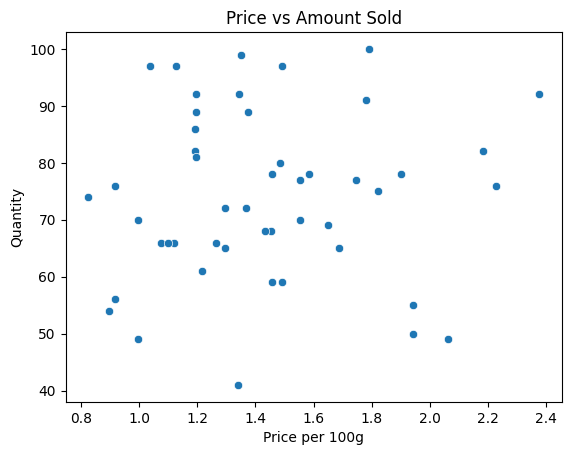

In [36]:
#aggregation
price_qty_agg = {"Price per 100g": "mean", "Quantity": "sum"}
price_qty = coffee_df.groupby("Product ID").agg(price_qty_agg)

#Scatterplot

sns.scatterplot(data= price_qty, x = "Price per 100g", y = "Quantity")
plt.title("Price vs Amount Sold")
plt.show()

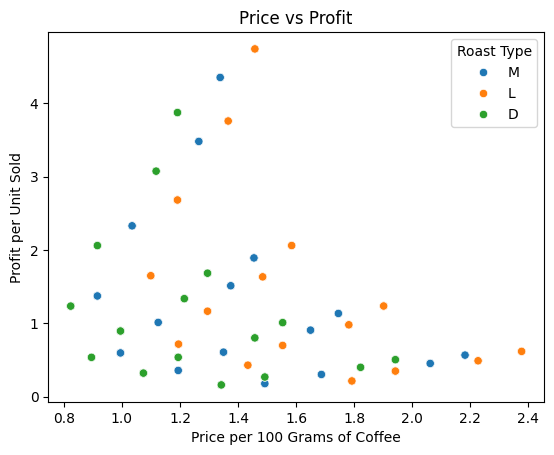

In [39]:
sns.scatterplot(data= coffee_df, x = "Price per 100g", y = "Profit", hue="Roast Type")
plt.title("Price vs Profit")
plt.xlabel("Price per 100 Grams of Coffee")
plt.ylabel("Profit per Unit Sold")
plt.show()

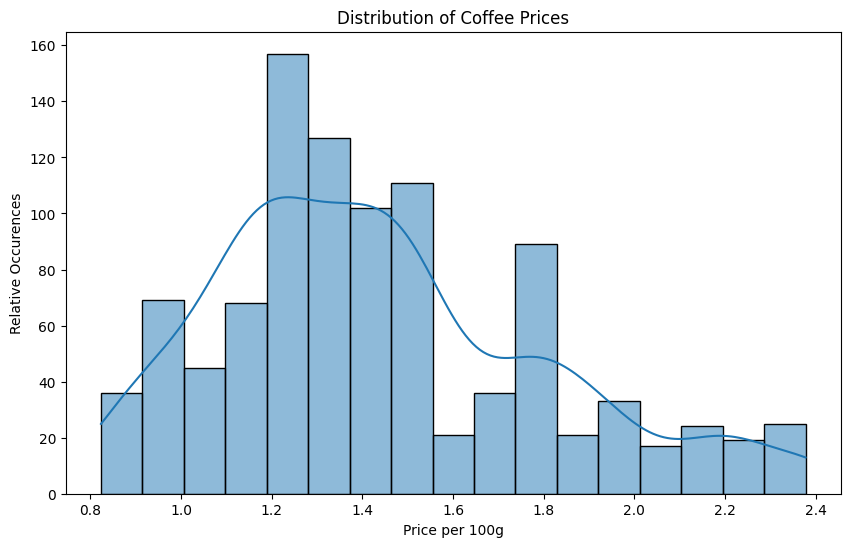

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=coffee_df, x="Price per 100g", kde=True) #Kernel Density Estimation

plt.title("Distribution of Coffee Prices")
plt.xlabel("Price per 100g")
plt.ylabel("Relative Occurences")
plt.show()

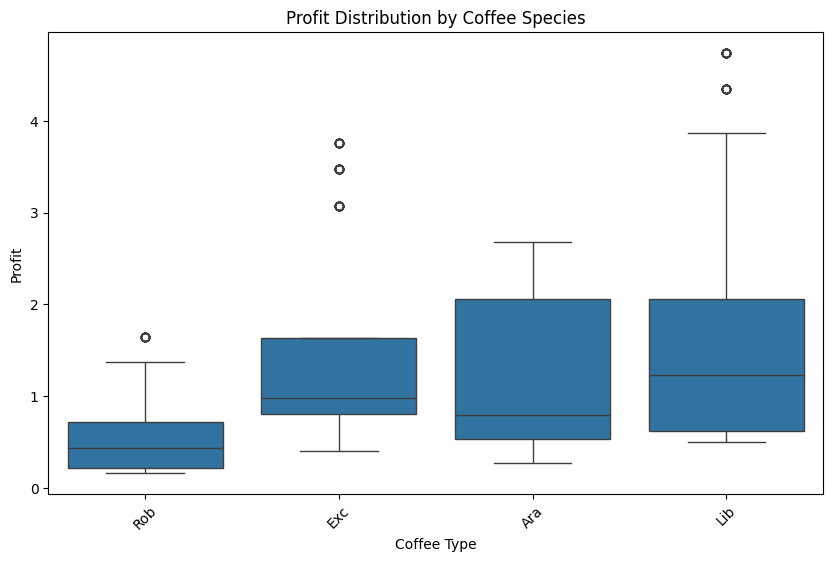

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = coffee_df, x="Coffee Type", y ="Profit")
plt.title("Profit Distribution by Coffee Species")
plt.xticks(rotation =45)
plt.show()

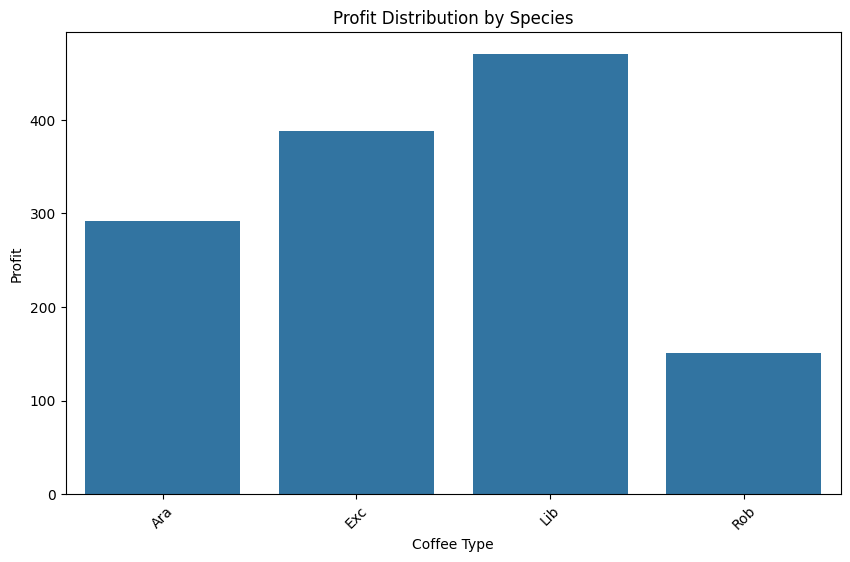

In [44]:
species_profit = coffee_df.groupby("Coffee Type").agg({"Profit": "sum"})

plt.figure(figsize=(10, 6))
sns.barplot(data=species_profit, x="Coffee Type", y="Profit")
plt.title("Profit Distribution by Species")
plt.xticks(rotation = 45)
plt.show()

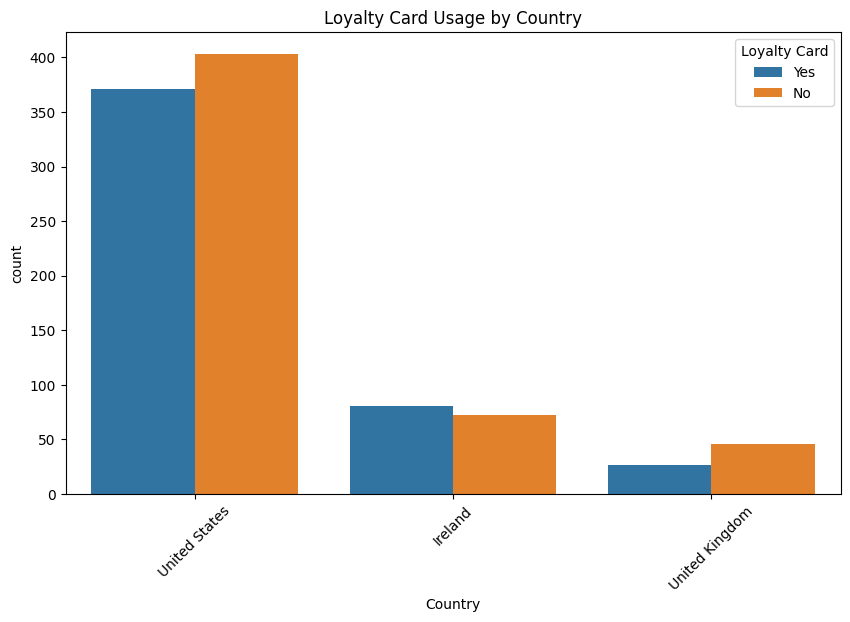

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=coffee_df, x="Country", hue="Loyalty Card")
plt.title("Loyalty Card Usage by Country")
plt.xticks(rotation=45)
plt.show()

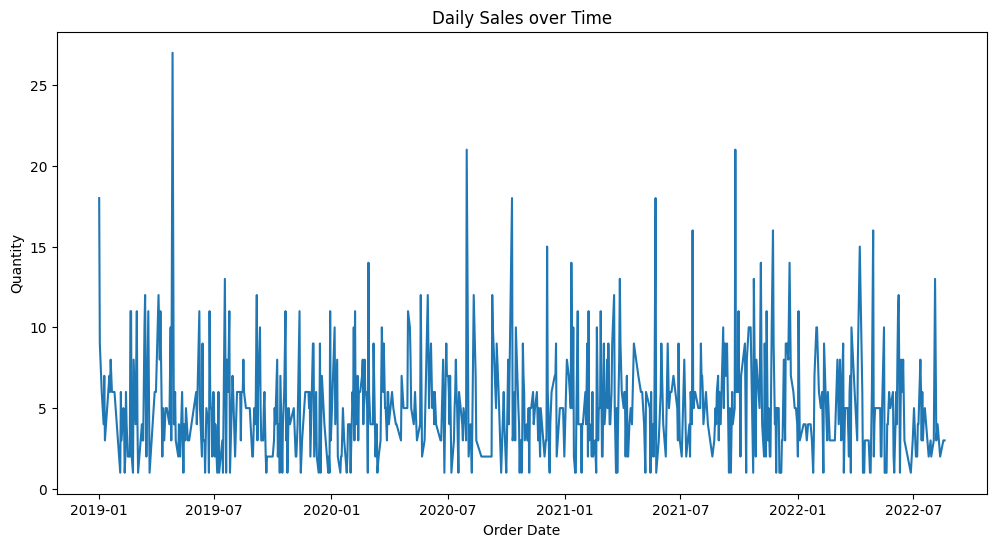

In [56]:
qty_agg = {"Quantity": "sum"}
daily_sales = coffee_df.groupby("Order Date").agg(qty_agg).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data = daily_sales, x="Order Date", y="Quantity")
plt.title("Daily Sales over Time")
plt.show()

/var/folders/ng/tt2m5s3d20v12sqlvz3tz3800000gn/T/ipykernel_58860/4242366319.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_frequency = pd.Grouper(key="Order Date", freq="M")


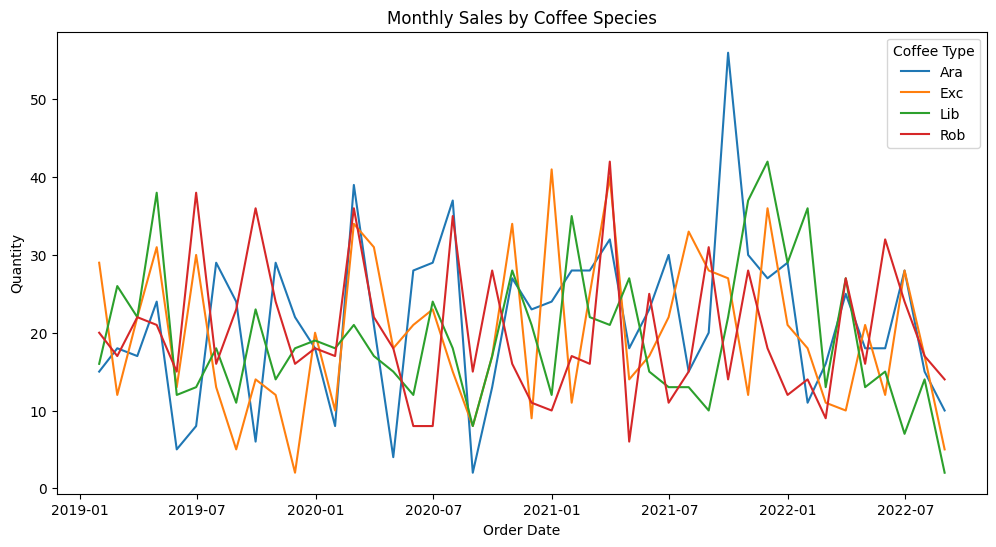

In [54]:
month_frequency = pd.Grouper(key="Order Date", freq="M")
month_group = [month_frequency, "Coffee Type"]
monthly_species = coffee_df.groupby(month_group).agg(qty_agg)

plt.figure(figsize=(12, 6))
sns.lineplot(data = monthly_species, x = "Order Date", y="Quantity", hue="Coffee Type")
plt.title("Monthly Sales by Coffee Species")
plt.show()